# Step 0: Importing the Libraries 


In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

 # Step 1: Importing the 'csv' Files and merging them into single 'csv'. 

In [2]:
# Get a list of all CSV files in a directory
files=glob.glob(r'C:\Users\HP\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\*.csv')

# Create an empty list to create a Dataframe
dfs=[]

# Read each CSV file and append it in a list
for file in files:
    df=pd.read_csv(file)
    dfs.append(df)
    
# Concatenate all the DataFrame into single DataFrame 

yearly_sales=pd.concat(dfs)


# Saving the Combined CSV File :

yearly_sales.to_excel("Yearly_Sales_2019.xlsx",index=False)


# Step 2: Read the DataFrame 



In [3]:
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Step 3: Data Cleaning

In [4]:
# Checking for Null Values in Dataset:
yearly_sales.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
# Drop the Null Values in Dataset:
yearly_sales.dropna(inplace=True)

In [6]:
# Recheck for the Null Values whether its dropped in Dataset:
yearly_sales.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Step 4: Business Questions

# Q1)  What was the best month for sales ? How much was earned that month? 

 ###  Add Month Column

In [7]:
# Adding the Month column:
yearly_sales["Month"]=yearly_sales['Order Date'].str[0:2]

In [8]:
# Checking that there are all unique months or not :
yearly_sales.Month.value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

In [9]:
# Displaying the "Or" Columns:

yearly_sales[yearly_sales.Month=="Or"].head(2)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [10]:
# Displaying rows where the 'Month' column is  not equal to 'Or'
yearly_sales = yearly_sales[yearly_sales['Month'] != 'Or']


In [11]:
# Checking whether the 'Or' values are dropped:
yearly_sales.Month.value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: Month, dtype: int64

In [12]:
# Converting the Month column into integer type:
yearly_sales.Month=yearly_sales.Month.astype('int32')

yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add Sales Column :


In [13]:
# Reading the Dataframe:
yearly_sales.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4


In [14]:
#Checking the datatypes of the Dataframe:
yearly_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [15]:
# Now converting the ['Quantity Ordered'] and ['Price Each'] column into Numeric Value:
yearly_sales['Quantity Ordered']=pd.to_numeric(yearly_sales['Quantity Ordered'])
yearly_sales['Price Each']=pd.to_numeric(yearly_sales['Price Each'])

In [16]:
# Now Adding the Sales Column:(We will multiply Quantity Ordered with Price Each to get the Sales.)
yearly_sales['Sales']=yearly_sales['Quantity Ordered']*yearly_sales['Price Each']

In [17]:
# Reading the Daaframe to check if the Sales column is added:
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Stats Operations:

In [18]:
# Using the Groupby Function on Month Column to get Montly Sales and Sort in desc Order.
results=yearly_sales.groupby("Month").sum().sort_values('Sales',ascending=False)
results

C:\Users\HP\AppData\Local\Temp\ipykernel_5376\2169206095.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=yearly_sales.groupby("Month").sum().sort_values('Sales',ascending=False)


,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


### Plotting the Graph : 
1) What was the best month for sales ? How much was earned that month?

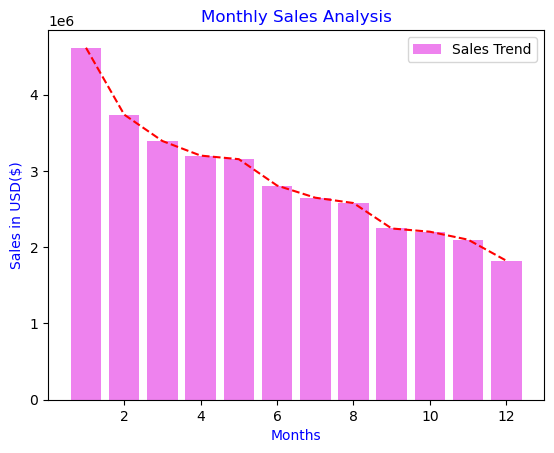

In [19]:
# Plotting the Bar Graph:

months=range(1,13)

plt.bar(months,results['Sales'],label="Sales Trend",color='violet')

plt.plot(months,results['Sales'],color='red',linestyle='--')

plt.title("Monthly Sales Analysis",color='blue')
plt.xlabel("Months",color='blue')
plt.ylabel("Sales in USD($)",color='blue')

plt.legend()

plt.show()



# Visual Insights : 
We conclude that December was the highest month of Sales , which contributed of  $4613443.34 USD 

# Q2) Which City had the highest number of Sales?

In [20]:
# Read The Dataframe :
yearly_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add City Column:

In [21]:
# Using .apply method lambda function:

yearly_sales['City']=yearly_sales['Purchase Address'].apply(lambda x:x.split(',')[1] + '(' + x.split(',')[2].split(' ')[1]+")")

yearly_sales.head(2)

# This add the City name followed by Country Code into brackets:

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)


### Stats Operation: 

In [22]:
# Using Groupby function to get the sum of Sales City wise :
results2=yearly_sales.groupby('City')['Sales'].sum()
results2

City
 Atlanta(GA)          2795498.58
 Austin(TX)           1819581.75
 Boston(MA)           3661642.01
 Dallas(TX)           2767975.40
 Los Angeles(CA)      5452570.80
 New York City(NY)    4664317.43
 Portland(ME)          449758.27
 Portland(OR)         1870732.34
 San Francisco(CA)    8262203.91
 Seattle(WA)          2747755.48
Name: Sales, dtype: float64

### Plotting the Graph
2)  Which City had the highest number of Sales?

C:\Users\HP\AppData\Local\Temp\ipykernel_5376\1138299176.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  cities=[city for city,df in yearly_sales.groupby(['City'])] # Use this for loop to get the proper city wise trend.


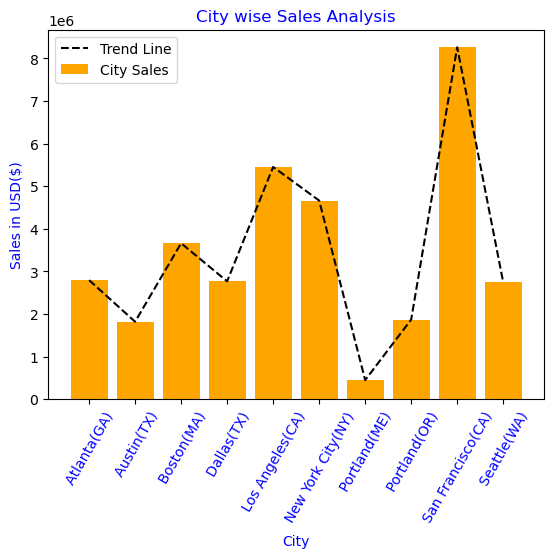

In [23]:
# Plotting the Graph:
cities=[city for city,df in yearly_sales.groupby(['City'])] # Use this for loop to get the proper city wise trend.

plt.bar(cities,results2,label='City Sales',color='orange')
plt.plot(cities,results2,color='black',linestyle='--',label="Trend Line")

plt.title("City wise Sales Analysis",color='blue')
plt.xlabel("City",color='blue')
plt.xticks(cities,rotation=-300,size=10,color='blue')
plt.ylabel("Sales in USD($)",color='blue')


plt.legend()
plt.show()


# Visual Insights:
From the above we can conclude that San Francisco(CA) city ranks the highest number of Sales 

# Q3) What time should we display advertisments to maximize the customers to buy products ?

In [24]:
# Read Dataframe:

yearly_sales.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)


In [25]:
# Covert the "Order Date" column into DateTime format:
yearly_sales['Order Date']=pd.to_datetime(yearly_sales['Order Date'])

### Adding Hour and Minutes Column:

In [26]:
# Adding the Hour and Minutes Column and converting into Hr and Minutes format:
yearly_sales['Hour']=yearly_sales['Order Date'].dt.hour
yearly_sales['Minute']=yearly_sales['Order Date'].dt.minute

yearly_sales.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30


### Plotting the Graph:
3) What time should we display advertisments to maximize the customers to buy products ?

C:\Users\HP\AppData\Local\Temp\ipykernel_5376\493983644.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  hours=[hour for hour,df in yearly_sales.groupby(['Hour'])]


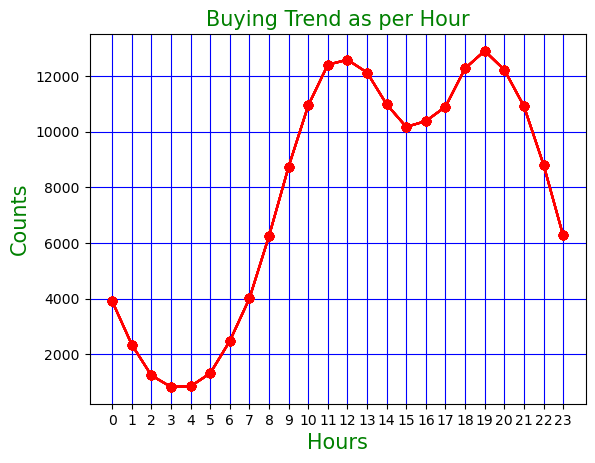

In [27]:
# Plotting the Graph:

hours=[hour for hour,df in yearly_sales.groupby(['Hour'])]

plt.plot(hours,yearly_sales.groupby(['Hour']).count(),marker='o',color='red')
plt.grid(color='blue')
plt.xticks(hours)
plt.xlabel("Hours",color='green',size=15)
plt.title("Buying Trend as per Hour",color='green',size=15)
plt.ylabel("Counts",color='green',size=15)
plt.show()



# Visual Insights :
From the above Line Graph , we can coclude that Peak Orders are been placed between,   
- (10am-11am) in Morning        
- (6pm-7pm) in the Evening   

So we can do advertisments between this these 2 hrs.   

# Q4) What products are most often sold together ?

In [28]:
# Read the Dataframe:
yearly_sales.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30


In [29]:
# Creating a New Dataframe and displaying the duplicated Order ID colums:
new_df=yearly_sales[yearly_sales['Order ID'].duplicated(keep=False)]

### Adding Grouped Column for list of Products:

In [30]:
# Creating a New Column for Items brought together:

new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))

# The above code , helps to tranform the Product column into Grouped Column, and joins it into single list wrt Order ID.


C:\Users\HP\AppData\Local\Temp\ipykernel_5376\714579622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))


In [31]:
# Reading the New Dataframe now:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [32]:
# Here we can see there are Duplicates in "Order ID"and "Grouped" Column, so we have to drop duplicates in these 2 columns:

new_df=new_df[['Order ID','Grouped']].drop_duplicates()
new_df.head(10)


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [33]:
# Now we want to count the Pairs that are there in Grouped  :

# Here we will import Combinations and Counter Library:(New Concept )

from itertools import combinations
from collections import Counter

count=Counter()

for row in new_df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [34]:
# To read it into more properly :

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Visual Insights:
We can see from the above data that Iphone and Lightning cable is usually both ordered  together, where the count is 1005.

# Q5) What product is sold the most ? Why do you think it is sold the most?

In [35]:
#Reading the Dataframe:
yearly_sales.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30


### Stats Operations:

In [36]:
product_group=yearly_sales.groupby('Product')
quantity_ordered=product_group['Quantity Ordered'].sum()
quantity_ordered.head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

In [37]:
#Sorting the Ordered Quanity into Descending Order:
quantity_ordered.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

### Plotting the Graph:
 5) What product is sold the most ?

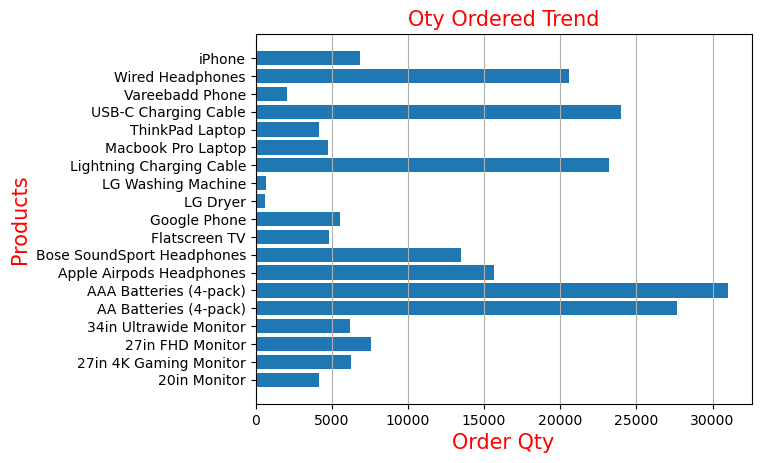

In [38]:
# Plotting the Horizontal Bar Graph :

products=[product for product ,df in product_group]

plt.barh(products, quantity_ordered)
plt.ylabel('Products',color='red',size=15)
plt.xlabel('Order Qty',color='red',size=15)
plt.title("Oty Ordered Trend",color='red',size=15)
plt.grid(axis='x')
plt.show()





# Visual Insights: 
From above graph we can conclude that AAA Batteries and AA Batteries are sold the most.

In [39]:
# Reason for which it is sold the most and  Getting the individual price of the Products

prices=yearly_sales.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

### Plotting the Graph:
Q5 Why do you think it is sold the most?(AA and AAA ,Batteries)

C:\Users\HP\AppData\Local\Temp\ipykernel_5376\797308325.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical')


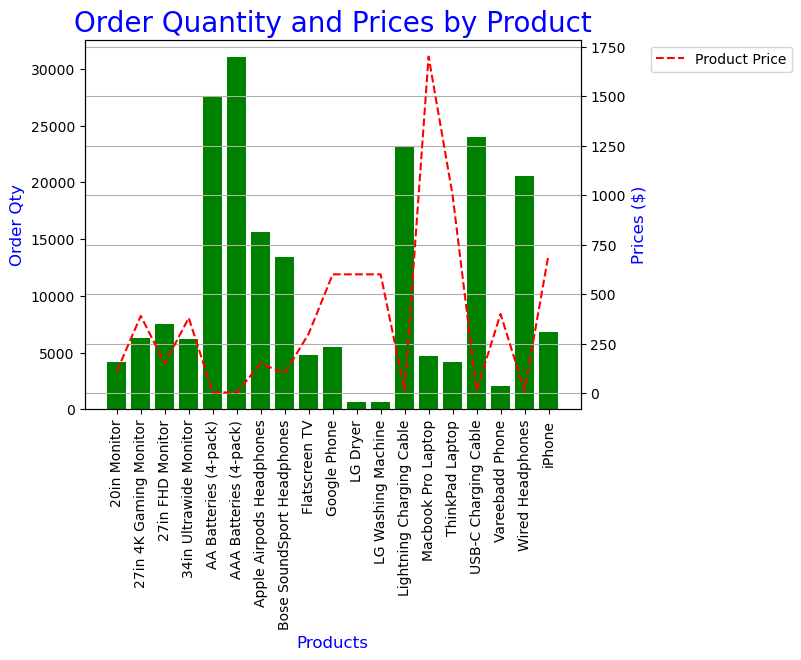

In [40]:
# Plotting the Product mean Data and order Qty on Bar Graph:

fig,ax1=plt.subplots()

ax2=ax1.twinx()

ax1.bar(products, quantity_ordered,color='green')
ax2.plot(products,prices,linestyle='--',color='red',label='Product Price')

ax1.set_xlabel("Products",size=12,color='b')
ax1.set_ylabel("Order Qty",size=12,color='b')
ax2.set_ylabel("Prices ($)",size=12,color='b')
ax1.set_xticklabels(products,rotation='vertical')
plt.title("Order Quantity and Prices by Product",size=20,color='b')
plt.grid()
plt.legend(bbox_to_anchor=(1.44,1))
plt.show()




# Visual Insights :
From the above graphs we can see that the Higher the Product Price , lesser is the Ordering Quantity, So due to that reason AA and AAA Batteries are sold the most.